<center><h1> Webscraping Project - Condos.ca</h1> </center>

<center><h3> Fengyuexin Huang & Charles Law & Xiang Ding </h3> </center>

# Table of Contents

1. [Install Required Libraries](#1.-Install-Required-Libraries)
2. [Data Scraping](#2.-Data-Scraping)
3. [Data Cleanup](#3.-Data-Cleanup)
4. [Analysis and Graphics](#4.-Analysis-and-Graphics)

## 1. Install Required Libraries

In [8]:
from bs4 import BeautifulSoup
import requests
from time import sleep
from collections import Counter
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Data Scraping

## 2.1 Get the link to condos.ca for rent in Toronto

<p> After we web scraped a link of the rent in Toronto, we found the HTTP response status code is 403. 
    Therefore, we used the 'request' library to change the user agent.<p>

In [ ]:
def get_page(page):
    url = f'https://condos.ca/toronto?mode=Rent&page={page}'
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36 Edg/110.0.1587.46'}    
    session = requests.Session()
    result = requests.get(url, headers=headers)
    soup = BeautifulSoup(result.content.decode())
    return soup

rentaldb = get_page(1)

In [ ]:
rentaldb

## 2.2 Check how many links we will scrap

In [371]:
links = []

for page_num in range(1,77):
    rentaldb = get_page(page_num)
    
    for x in rentaldb.find_all('a',class_='styles___Link-sc-54qk44-1 fDWBFh'):
        links.append('http://condos.ca' + x.get('href'))


In [372]:
len(links)

3280

### 2.3 Create Dictionary to Store Values

In [8]:
houses = {
    'Address':[],
    'Price':[],
    'Neighbourhood':[],
    'Area':[],
    'Room':[],
    'Bath':[],
    'Parking':[],
    'Furnished':[],
    'AgeofBuild':[],
    'OutdoorSpace':[],
    'PropertyType':[],
    'Size':[]
}

## 2.4 Crawling Data

<p> Used for loop to get information such as the house's address, rent price, neighbourhood, the located area, how many rooms, how many baths are there, how many parking is there, is furnished or not, the age of the building, outdoor space, property type, the size of the place.<p>

In [380]:
## first get the link, set the speed for crawling data
for link in links:
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36 Edg/110.0.1587.46'}
    result = requests.get(link, headers=headers)
    sleep(1)
    soup = BeautifulSoup(result.content.decode())
    
    
    try: ## get the column 'address'
        houses['Address'].append(soup.find('h1',class_='styles___Title-sc-ka5njm-7 iMYmnJ').get_text())
    except:
        houses['Address'].append('NA')
    
    try: ## get the column 'Price'
        houses['Price'].append(soup.find('div',class_='styles___Price-sc-ka5njm-25 jcbcec').get_text())
    except:
        houses['Price'].append('NA')
   
    try: ## get the column 'Neighbourhood'
        houses['Neighbourhood'].append(soup.find('a',class_='styles___AddressInlineLink-sc-ka5njm-31 bARpRt').get_text())
    except:
        houses['Neighbourhood'].append('NA')

    try: ## get the column 'Area'
        houses['Area'].append(soup.find('a',class_='styles___AddressInlineLink-sc-ka5njm-31 hVlEZL').get_text())
    except:
        houses['Area'].append('NA')
   
    p=1   
    for m in soup.find_all('span',class_='styles___BlurCont-sc-qq1hs5-0'):
        if p==1: ## get the column 'Room'
            try: 
                houses['Room'].append(m.get_text())
                p+=1
                print(m.get_text())
            except:
                houses['Room'].append('NA')
                p+=1
        elif p==2: ## get the column 'Bath'
            try:
                houses['Bath'].append(m.get_text())
                p+=1
                print(m.get_text())
            except:
                houses['Bath'].append('NA')
                p+=1
        elif p==3: ## get the column 'Parking'
            try:
                houses['Parking'].append(m.get_text())
                p+=1
                print(m.get_text())
            except:
                houses['Parking'].append('NA')
                p+=1
        else:
            p+=1
            break


    i=1   
    for s in soup.find_all('div',class_='styles___BlurCont-sc-qq1hs5-0 styles___InfoRowValue-sc-1cv9cf1-4 hvTiCH'):
        if i in (1,2,4,7,8,9,10,12,13,14,15,16):
            i+=1  # i=i+1  i+
        elif i==3: ## get the column 'Furnished'
            try: 
                houses['Furnished'].append(s.get_text())
                i+=1
                print(s.get_text())
            except:
                houses['Furnished'].append('NA')
                i+=1
        elif i==5: ## get the column 'AgeofBuild'
            try:
                houses['AgeofBuild'].append(s.get_text())
                i+=1
                print(s.get_text())
            except:
                houses['AgeofBuild'].append('NA')
                i+=1            
        elif i==6: ## get the column 'OutdoorSpace'
            try:
                houses['OutdoorSpace'].append(s.get_text())
                i+=1
                print(s.get_text())
            except:
                houses['OutdoorSpace'].append('NA')
                i+=1
        elif i==11: ## get the column 'PropertyType'
            try:
                houses['PropertyType'].append(s.get_text())
                i+=1
                print(s.get_text())
            except:
                houses['PropertyType'].append('NA')
                i+=1
        elif i==17: ## get the column 'Size'
            try:
                houses['Size'].append(s.get_text())
                i+=1
                print(s.get_text())
            except:
                houses['Size'].append('NA')
                i+=1 
        else:
            i+=1 
            break            

1+1
1
1
No
10 years old
Open Balcony
Condo Apt
56-65 sqm
1+1
1
1
No
-
Open Balcony
Condo Apt
56-65 sqm
2+1
2
1
No
4 years old
Terrace
Condo Apt
74-84 sqm
1
1
0
No
2 years old
Open Balcony
Condo Apt
46-56 sqm
1+1
2
1
No
3 years old
Open Balcony
Condo Apt
56-65 sqm
1
1
0
No
14 years old
None
Condo Apt
0-46 sqm
1+1
2
1
No
2 years old
Open Balcony
Comm Element Condo
56-65 sqm
1
1
0
No
5 years old
Open Balcony
Condo Apt
46-56 sqm
2
2
1
No
18 years old
Open Balcony
Condo Apt
84-93 sqm
1
1
1
No
1 years old
Open Balcony
Condo Apt
46-56 sqm
1+1
1
0
No
New
Open Balcony
Condo Apt
56-65 sqm
2
2
0
No
18 years old
Open Balcony
Condo Apt
93-111 sqm
1+1
1
0
No
3 years old
Open Balcony
Condo Apt
56-65 sqm
2
1
0
Part
New
Open Balcony
Condo Apt
1+1
1
0
No
1 years old
Terrace
Condo Apt
0-46 sqm
1
1
0
No
0 years old
Open Balcony
Condo Apt
46-56 sqm
1+1
1
0
No
0 years old
Open Balcony
Condo Apt
46-56 sqm
1
1
1
No
14 years old
Terrace
Condo Apt
65-74 sqm
2
2
1
No
0 years old
Open Balcony
Condo Apt
56-65 sqm


In [ ]:
## check dictionary 

print(houses)

In [478]:
## check the length of the keys and the length of size is not equal to the other. 

## Therefore, we can use the dictionary's key for data frame column print(len(houses['Address']))

print(len(houses['Price']))
print(len(houses['Neighbourhood']))
print(len(houses['Room']))
print(len(houses['Bath']))
print(len(houses['Parking']))
print(len(houses['Furnished']))
print(len(houses['AgeofBuild']))
print(len(houses['OutdoorSpace']))
print(len(houses['PropertyType']))
print(len(houses['Size']))

3280
3280
3280
3272
3272
3272
3245
3245
3245
3245
2827


## 2.5 Get the data frame

In [453]:
## save the dictionary to the data frame as csv
 
full_data = pd.DataFrame.from_dict(houses,orient='index').to_csv('fulldata.csv',mode='w')

## 3. Data Cleanup

## 3.1 Clean up the data frame

In [13]:
## test: read the data frame
df = pd.read_csv('fulldata.csv')
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,3270,3271,3272,3273,3274,3275,3276,3277,3278,3279
0,Address,3708 - 2230 Lake Shore Blvd W,601 - 840 St Clair Ave W,1502 - 170 Bayview Ave,1205 - 30 Ordnance St,713 - 12 Bonnycastle St,1114 - 96 St. Patrick St,#2507 - 2 Sonic Way,1102 - 525 Adelaide St W,918 - 80 Harrison Garden Blvd,...,6305 - 10 York St,2310 - 50 Wellesley St,2117 - 1928 Lake Shore Blvd West Blvd W,501 Yonge St,301 - 18 Merton St,1317 - 87 Peter St,PHC - 7 Broadway Ave,52 Rock Moss Way,1005 - 1060 Sheppard Ave W,1501 - 2 Avenue Rd
1,Price,"$2,700","$2,500","$3,500","$2,450","$3,000","$2,200","$2,350","$2,450","$2,600",...,"$8,500","$3,400","$2,800",$250,"$4,354","$2,525","$3,875","$3,000","$3,500","$5,250"
2,Neighbourhood,Mimico,Oakwood-Vaughan,Corktown,Fort York,The Waterfront,Grange Park,Flemingdon Park,King West,Willowdale East,...,The Waterfront,Church St. Corridor,South Parkdale,Church St. Corridor,Mount Pleasant West,King West,Mount Pleasant West,Hillcrest Village,York University Heights,Yorkville
3,Area,Etobicoke,Midtown | Central,Downtown,Downtown,Downtown,Downtown,North York,Downtown,North York,...,Downtown,Downtown,West End,Downtown,Midtown | Central,Downtown,Midtown | Central,North York,North York,Downtown
4,Room,1+1,1+1,2+1,1,1+1,1,1+1,1,2,...,2+1,1+1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Bath,1,1,2,1,2,1,2,1,2,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Parking,1,1,1,0,1,0,1,0,1,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Furnished,No,No,No,No,No,No,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AgeofBuild,10 years old,-,4 years old,2 years old,3 years old,14 years old,2 years old,5 years old,18 years old,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,OutdoorSpace,Open Balcony,Open Balcony,Terrace,Open Balcony,Open Balcony,None,Open Balcony,Open Balcony,Open Balcony,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
## transform the column to row and the row to column
df = df.T

## drop the rows containing non-value
df=df.dropna()

## the columns are numbers, therefore, rename all columns
df=df.rename(columns={0:'Address',1:'Price', 2 :'Neighbourhood',3:'Area',4:'Room',
                  5:'Bath',6:'Parking', 7:'Furnished', 8:'AgeofBuild', 9:'OutdoorSpace',
                  10:'PropertyType',11:'Size'})

## drop the first row because it just the column name
df=df.drop(index=['Unnamed: 0'])

In [15]:
## check the dataframe
df

,Address,Price,Neighbourhood,Area,Room,Bath,Parking,Furnished,AgeofBuild,OutdoorSpace,PropertyType,Size
0,3708 - 2230 Lake Shore Blvd W,"$2,700",Mimico,Etobicoke,1+1,1,1,No,10 years old,Open Balcony,Condo Apt,56-65 sqm
1,601 - 840 St Clair Ave W,"$2,500",Oakwood-Vaughan,Midtown | Central,1+1,1,1,No,-,Open Balcony,Condo Apt,56-65 sqm
2,1502 - 170 Bayview Ave,"$3,500",Corktown,Downtown,2+1,2,1,No,4 years old,Terrace,Condo Apt,74-84 sqm
3,1205 - 30 Ordnance St,"$2,450",Fort York,Downtown,1,1,0,No,2 years old,Open Balcony,Condo Apt,46-56 sqm
4,713 - 12 Bonnycastle St,"$3,000",The Waterfront,Downtown,1+1,2,1,No,3 years old,Open Balcony,Condo Apt,56-65 sqm
...,...,...,...,...,...,...,...,...,...,...,...,...
2822,3705 - 1928 Lakeshore Boulevard W,"$3,100",South Parkdale,West End,3,3,1,No,4 years old,Open Balcony,Condo Apt,130-149 sqm
2823,307 - 35 Tubman Ave,"$3,000",Regent Park,Downtown,2,2,1,No,3 years old,Open Balcony,Comm Element Condo,46-56 sqm
2824,#2 - 795 Broadview Ave,"$2,800",Playter Estates-Danforth,East York,2,2,1,No,0 years old,Open Balcony,Condo Apt,130-149 sqm
2825,923 - 352 Front St W,"$2,300",King West,Downtown,1+1,1,1,No,32 years old,Open Balcony,Condo Apt,111-130 sqm


In [16]:
## check if there is any duplicate row

df.drop_duplicates()

,Address,Price,Neighbourhood,Area,Room,Bath,Parking,Furnished,AgeofBuild,OutdoorSpace,PropertyType,Size
0,3708 - 2230 Lake Shore Blvd W,"$2,700",Mimico,Etobicoke,1+1,1,1,No,10 years old,Open Balcony,Condo Apt,56-65 sqm
1,601 - 840 St Clair Ave W,"$2,500",Oakwood-Vaughan,Midtown | Central,1+1,1,1,No,-,Open Balcony,Condo Apt,56-65 sqm
2,1502 - 170 Bayview Ave,"$3,500",Corktown,Downtown,2+1,2,1,No,4 years old,Terrace,Condo Apt,74-84 sqm
3,1205 - 30 Ordnance St,"$2,450",Fort York,Downtown,1,1,0,No,2 years old,Open Balcony,Condo Apt,46-56 sqm
4,713 - 12 Bonnycastle St,"$3,000",The Waterfront,Downtown,1+1,2,1,No,3 years old,Open Balcony,Condo Apt,56-65 sqm
...,...,...,...,...,...,...,...,...,...,...,...,...
2822,3705 - 1928 Lakeshore Boulevard W,"$3,100",South Parkdale,West End,3,3,1,No,4 years old,Open Balcony,Condo Apt,130-149 sqm
2823,307 - 35 Tubman Ave,"$3,000",Regent Park,Downtown,2,2,1,No,3 years old,Open Balcony,Comm Element Condo,46-56 sqm
2824,#2 - 795 Broadview Ave,"$2,800",Playter Estates-Danforth,East York,2,2,1,No,0 years old,Open Balcony,Condo Apt,130-149 sqm
2825,923 - 352 Front St W,"$2,300",King West,Downtown,1+1,1,1,No,32 years old,Open Balcony,Condo Apt,111-130 sqm


## 3.2 Convert `str` type to `int` in the `Price` column

In [17]:
## check the column 


df['Price']

0       $2,700
1       $2,500
2       $3,500
3       $2,450
4       $3,000
         ...  
2822    $3,100
2823    $3,000
2824    $2,800
2825    $2,300
2826    $2,600
Name: Price, Length: 2783, dtype: object

In [18]:
## test the first row to remove the '$' and ', ' if the method is successful or not
df['Price'][0].replace('$','')

'2,700'

In [19]:
## use the for loop to apply all rows

for i in range(0,2783):
    df['Price'][i]=df['Price'][i].replace('$','')
    df['Price'][i]=df['Price'][i].replace(',','')
    i+=1
df['Price'] = df['Price'].astype(int)

## 3.3 Convert `str` type to `int` in the `Parking` column


In [20]:
df['Parking'] = df['Parking'].astype(int)

## 3.4 Convert `str` type to `int` in the `Bath` column


In [21]:
df['Bath'] = df['Bath'].astype(int)

## 3.5 Convert `str` type to `int` in the `Size` column


In [22]:
## test the first row which we just want to get  the maximum of room size if the method is successful or not

df['Size'][2782].split('-')[1].split(' ')[0]

'111'

In [23]:
## use the for loop to apply all rows and drop the last row which can not get the maximum of the size

for i in range(0,2782):
    df['Size'][i] = df['Size'][i].split('-')[1].split(' ')[0]
    i+=1
df = df.drop(index=['2826'])

C:\Users\13911\AppData\Local\Temp\ipykernel_31912\2851568537.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'][i] = df['Size'][i].split('-')[1].split(' ')[0]


In [24]:
## Convert `str` type to `int` in the `Size` column

df['Size'] = df['Size'].astype(int)

In [25]:
# check the data frame

df

,Address,Price,Neighbourhood,Area,Room,Bath,Parking,Furnished,AgeofBuild,OutdoorSpace,PropertyType,Size
0,3708 - 2230 Lake Shore Blvd W,2700,Mimico,Etobicoke,1+1,1,1,No,10 years old,Open Balcony,Condo Apt,65
1,601 - 840 St Clair Ave W,2500,Oakwood-Vaughan,Midtown | Central,1+1,1,1,No,-,Open Balcony,Condo Apt,65
2,1502 - 170 Bayview Ave,3500,Corktown,Downtown,2+1,2,1,No,4 years old,Terrace,Condo Apt,84
3,1205 - 30 Ordnance St,2450,Fort York,Downtown,1,1,0,No,2 years old,Open Balcony,Condo Apt,56
4,713 - 12 Bonnycastle St,3000,The Waterfront,Downtown,1+1,2,1,No,3 years old,Open Balcony,Condo Apt,65
...,...,...,...,...,...,...,...,...,...,...,...,...
2821,25 - 8 Mallory Gdns,2200,Yonge-St. Clair,Midtown | Central,1,1,0,No,2 years old,Open Balcony,Condo Apt,46
2822,3705 - 1928 Lakeshore Boulevard W,3100,South Parkdale,West End,3,3,1,No,4 years old,Open Balcony,Condo Apt,149
2823,307 - 35 Tubman Ave,3000,Regent Park,Downtown,2,2,1,No,3 years old,Open Balcony,Comm Element Condo,56
2824,#2 - 795 Broadview Ave,2800,Playter Estates-Danforth,East York,2,2,1,No,0 years old,Open Balcony,Condo Apt,149


## 3.5 Clean up the `Furnished` column, only keep `Yes`, `No` and `Part`

In [26]:
## Check all categories of the  `Furnished` column except 'Yes', ' No' and 'Part'

for status in range(1,2782):
    if df['Furnished'][status] != 'Yes' and df['Furnished'][status] != 'No' and df['Furnished'][status] != 'Part':
        print(df['Furnished'][status])

Negotiable
May 1st
30 Days Tba
Immediate
Vacant
Vacant
Tbd
Immediate/Nela
Immediate
Immediate
2023-05-01 00:
Feb 15/ Mar 1
Immediate/Tbd
2023-04-01 00:
Immediate
April 1/2023
2023-02-15 00:
2023-03-01 00:
Tbd
Immediately
Immediate
Immed
15 March 2023
2023-04-01 00:
Flexible
Immediate
2023-04-01 00:
Tba
Immediate
Tbd
2023-02-06 00:
2023-02-05 00:
2023-02-05 00:
Immediate
2023-03-01 00:
Imm/Mar 1
Immediate
2023-04-01 00:
2023-03-01 00:
2023-03-01 00:
Tba
Imm/Mar 1
2023-02-01 00:
Immediate
Immediate
Immediate
Immediate
2023-03-01 00:
Tbd
2023-04-01 00:
Immediate
March 15
2023-04-01 00:
Tba
March 1
Flex/Immed
Flexible
Immediate
Flexible
Immediate
Immed./Flex.
Immediate
Tbd
Imm - Flex
Immed.Or T.B.A
Vacant
April 2/Tba
2023-03-15 00:
Immediate
Immediate
Flex/30/60
Flex
Tbd
Vacant / Tba
Immed/Tba
Immediate
Immediate
Tba
2023-02-01 00:
Feb 1st


In [17]:
## Got the rows only containing the 'Furnished' are 'Yes', 'No' and 'Part'

df = df.loc[(df['Furnished'] == 'No') | (df['Furnished'] == 'Yes') | (df['Furnished'] == 'Part')]

# Alternative way
# df = df.drop(df[(df.Furnished != 'Yes') & (df.Furnished != 'No') & (df.Furnished != 'Part')].index)


In [27]:
## check the cloumns' type

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2782 entries, 0 to 2825
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Address        2782 non-null   object
 1   Price          2782 non-null   int32 
 2   Neighbourhood  2782 non-null   object
 3   Area           2782 non-null   object
 4   Room           2782 non-null   object
 5   Bath           2782 non-null   int32 
 6   Parking        2782 non-null   int32 
 7   Furnished      2782 non-null   object
 8   AgeofBuild     2782 non-null   object
 9   OutdoorSpace   2782 non-null   object
 10  PropertyType   2782 non-null   object
 11  Size           2782 non-null   int32 
dtypes: int32(4), object(8)
memory usage: 239.1+ KB


In [28]:
## check the data frame

df.describe()

,Price,Bath,Parking,Size
count,2782.000000,2782.000000,2782.000000,2782.000000
mean,3124.514738,1.551402,0.645938,79.857656
std,1387.249799,0.644773,0.567693,33.001300
min,149.000000,1.000000,0.000000,46.000000
25%,2500.000000,1.000000,0.000000,56.000000
50%,2800.000000,1.000000,1.000000,74.000000
75%,3300.000000,2.000000,1.000000,84.000000
max,25000.000000,5.000000,4.000000,372.000000


## 3.6 Save the data frame to scv

In [29]:
df=df.to_csv('df.csv',mode='w')

## 3.7 Read csv into DataFrame

In [30]:
df = pd.read_csv('df.csv')

In [31]:
## Check the data frame 

df

,Unnamed: 0,Address,Price,Neighbourhood,Area,Room,Bath,Parking,Furnished,AgeofBuild,OutdoorSpace,PropertyType,Size
0,0,3708 - 2230 Lake Shore Blvd W,2700,Mimico,Etobicoke,1+1,1,1,No,10 years old,Open Balcony,Condo Apt,65
1,1,601 - 840 St Clair Ave W,2500,Oakwood-Vaughan,Midtown | Central,1+1,1,1,No,-,Open Balcony,Condo Apt,65
2,2,1502 - 170 Bayview Ave,3500,Corktown,Downtown,2+1,2,1,No,4 years old,Terrace,Condo Apt,84
3,3,1205 - 30 Ordnance St,2450,Fort York,Downtown,1,1,0,No,2 years old,Open Balcony,Condo Apt,56
4,4,713 - 12 Bonnycastle St,3000,The Waterfront,Downtown,1+1,2,1,No,3 years old,Open Balcony,Condo Apt,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,2821,25 - 8 Mallory Gdns,2200,Yonge-St. Clair,Midtown | Central,1,1,0,No,2 years old,Open Balcony,Condo Apt,46
2778,2822,3705 - 1928 Lakeshore Boulevard W,3100,South Parkdale,West End,3,3,1,No,4 years old,Open Balcony,Condo Apt,149
2779,2823,307 - 35 Tubman Ave,3000,Regent Park,Downtown,2,2,1,No,3 years old,Open Balcony,Comm Element Condo,56
2780,2824,#2 - 795 Broadview Ave,2800,Playter Estates-Danforth,East York,2,2,1,No,0 years old,Open Balcony,Condo Apt,149


## 4. Analysis and Graphics

## 4.1.1 Anslysis the cloumn 'Price'


In [32]:
df['Price'].agg(['min','max','mean','count'])

min        149.000000
max      25000.000000
mean      3124.514738
count     2782.000000
Name: Price, dtype: float64

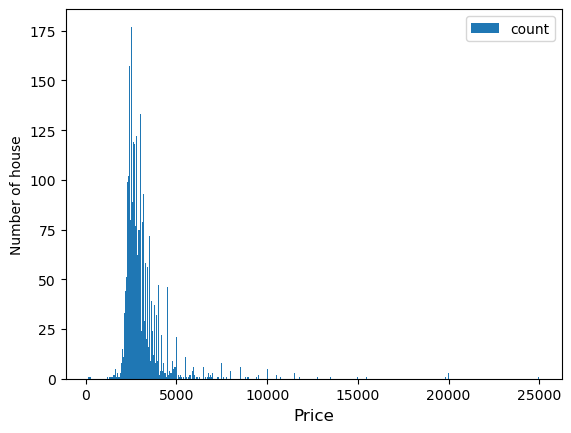

In [33]:
df['Price'].plot(kind='hist',bins=500,label='count')
plt.xlabel('Price', fontsize=12)
plt.ylabel('Number of house',fontsize=10)
plt.legend(loc='upper right');

{'whiskers': [<matplotlib.lines.Line2D at 0x1bd0a8a9e20>,
 'caps': [<matplotlib.lines.Line2D at 0x1bd0a8eb550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bd0a8a9c70>],
 'medians': [<matplotlib.lines.Line2D at 0x1bd0a8eb9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bd0a8ebd60>],
 'means': []}

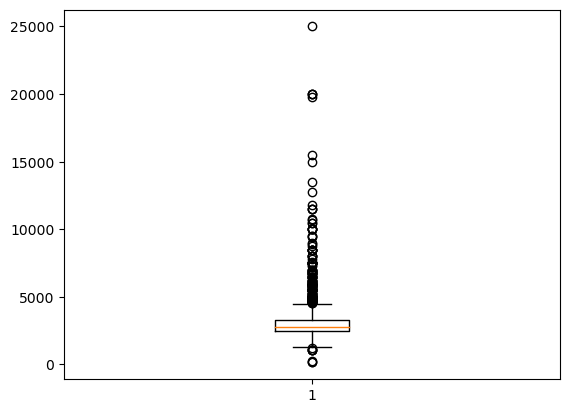

In [34]:
plt.boxplot(df['Price'])

## 4.1.2 Anslysis The Cloumn 'Price'


In [35]:
df['Area'].unique()

array(['Etobicoke', 'Midtown | Central', 'Downtown', 'North York',
       'East End', 'West End', 'Scarborough', 'York Crosstown',
       'East York'], dtype=object)

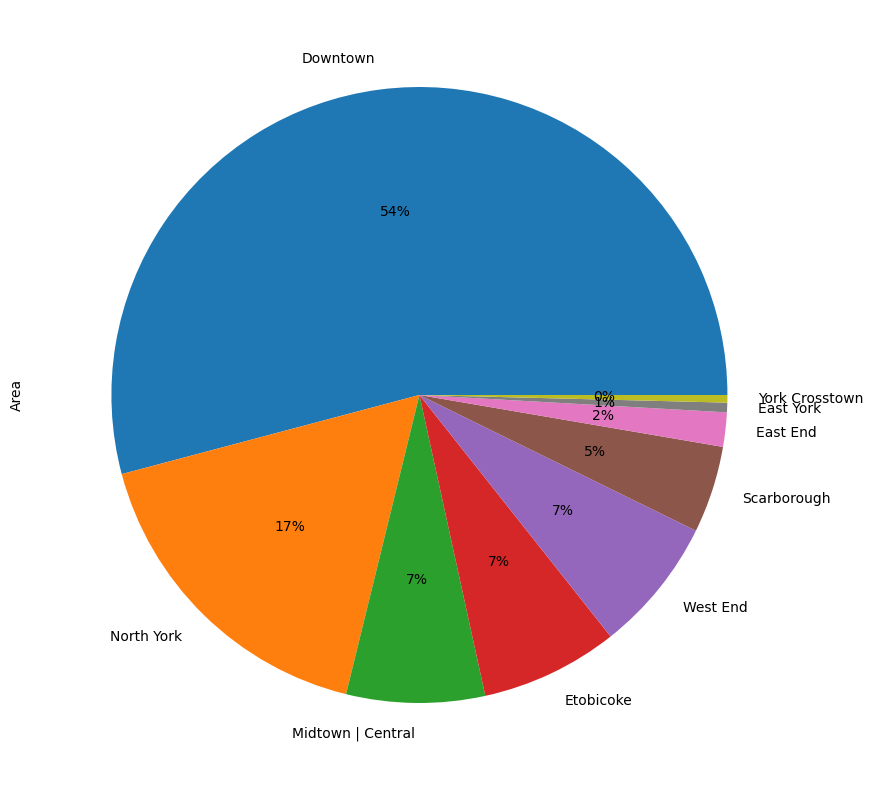

In [36]:
df['Area'].value_counts().plot(kind='pie',figsize=(10,10),autopct='%1.0f%%');

In [37]:
df['Area'].value_counts()

Downtown             1506
North York            474
Midtown | Central     202
Etobicoke             201
West End              197
Scarborough           127
East End               50
East York              14
York Crosstown         11
Name: Area, dtype: int64

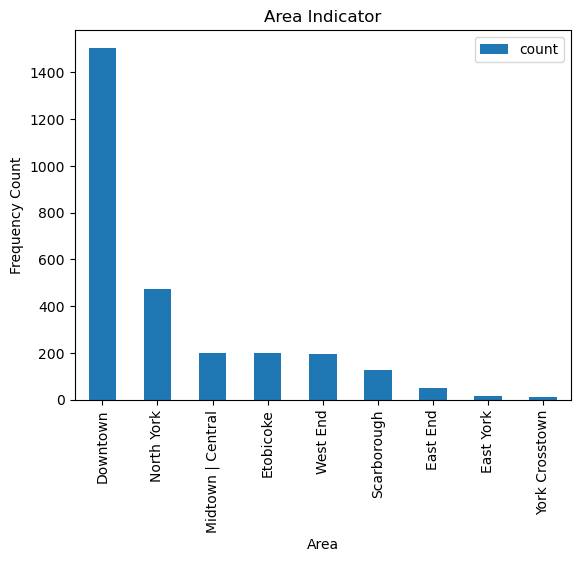

In [38]:
df['Area'].value_counts().plot(kind='bar', title = 'Area Indicator',label='count')
plt.xlabel('Area', fontsize=10);
plt.ylabel('Frequency Count', fontsize=10)
plt.legend(loc='upper right');

## 4.1.3 Calculate Min,Max,Mean,Count Price Per Area

In [39]:
df.groupby('Area')['Price'].agg(['min','max','mean','count','median'])

,min,max,mean,count,median
Area,,,,,
Downtown,200,25000,3230.871846,1506,2800.0
East End,1100,5950,2863.900000,50,2675.0
East York,2200,3800,2730.000000,14,2597.5
Etobicoke,1990,7500,2927.353234,201,2750.0
Midtown | Central,1700,11500,3384.247525,202,2850.0
North York,149,20000,2986.575949,474,2900.0
Scarborough,1100,3600,2653.653543,127,2700.0
West End,1595,6800,3009.030457,197,2800.0
York Crosstown,1900,3000,2531.454545,11,2600.0


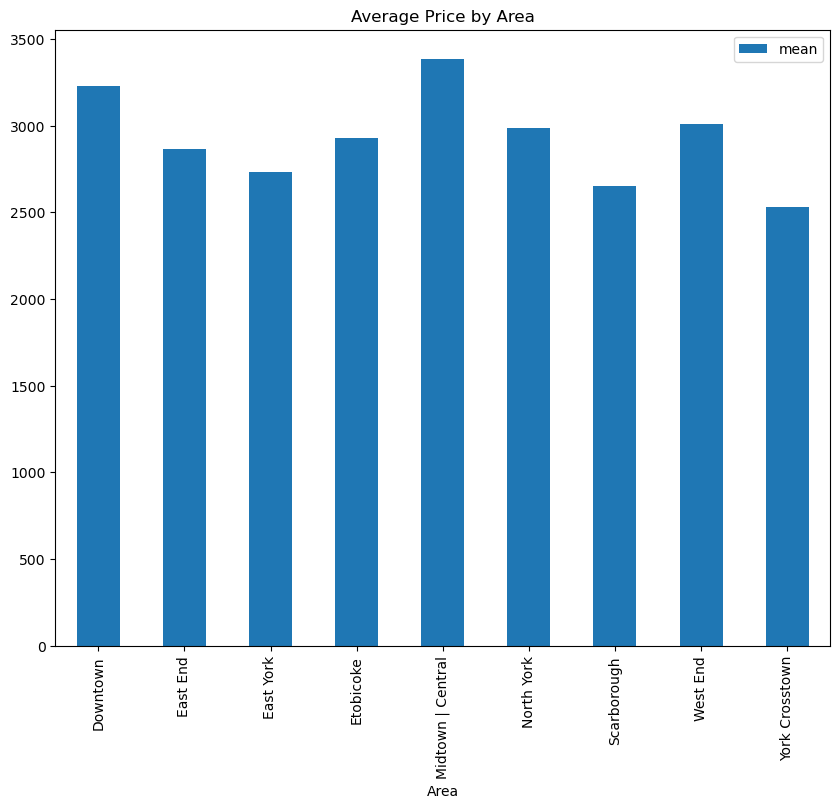

In [40]:
df.groupby('Area')['Price'].agg(['mean']).plot(kind='bar',title='Average Price by Area',figsize=(10,8));

## 4.1.4 Multiple Lines Price By Area

In [41]:
## use for loop can not change name of the line

# for area in df['Area'].unique():
    
#     area = df[df['Area'] == area] \
#         .groupby(['Price'], as_index=False) \
#         .agg({'Price': 'mean', 'Area': 'count'}) \
#         .rename(columns={'Area': 'count'}) \
#         .sort_values('Price')

In [42]:
Etobicoke=  df[df['Area'] == 'Etobicoke'] \
    .groupby(['Price'], as_index=False) \
    .agg({'Price': 'mean', 'Area': 'count'}) \
    .rename(columns={'Area': 'count'}) \
    .sort_values('Price')

Midtown_Central = df[df['Area'] == 'Midtown_Central'] \
    .groupby(['Price'], as_index=False) \
    .agg({'Price': 'mean', 'Area': 'count'}) \
    .rename(columns={'Area': 'count'}) \
    .sort_values('Price')

Downtown = df[df['Area'] == 'Downtown'] \
    .groupby(['Price'], as_index=False) \
    .agg({'Price': 'mean', 'Area': 'count'}) \
    .rename(columns={'Area': 'count'}) \
    .sort_values('Price')

North_York = df[df['Area'] == 'North York'] \
    .groupby(['Price'], as_index=False) \
    .agg({'Price': 'mean', 'Area': 'count'}) \
    .rename(columns={'Area': 'count'}) \
    .sort_values('Price')

East_End= df[df['Area'] == 'East End'] \
    .groupby(['Price'], as_index=False) \
    .agg({'Price': 'mean', 'Area': 'count'}) \
    .rename(columns={'Area': 'count'}) \
    .sort_values('Price')

West_End=df[df['Area'] == 'West End'] \
    .groupby(['Price'], as_index=False) \
    .agg({'Price': 'mean', 'Area': 'count'}) \
    .rename(columns={'Area': 'count'}) \
    .sort_values('Price')

Scarborough=df[df['Area'] == 'Scarborough'] \
    .groupby(['Price'], as_index=False) \
    .agg({'Price': 'mean', 'Area': 'count'}) \
    .rename(columns={'Area': 'count'}) \
    .sort_values('Price')

York_Crosstown=df[df['Area'] == 'York Crosstown'] \
    .groupby(['Price'], as_index=False) \
    .agg({'Price': 'mean', 'Area': 'count'}) \
    .rename(columns={'Area': 'count'}) \
    .sort_values('Price')

East_York=df[df['Area'] == 'East York'] \
    .groupby(['Price'], as_index=False) \
    .agg({'Price': 'mean', 'Area': 'count'}) \
    .rename(columns={'Area': 'count'}) \
    .sort_values('Price')

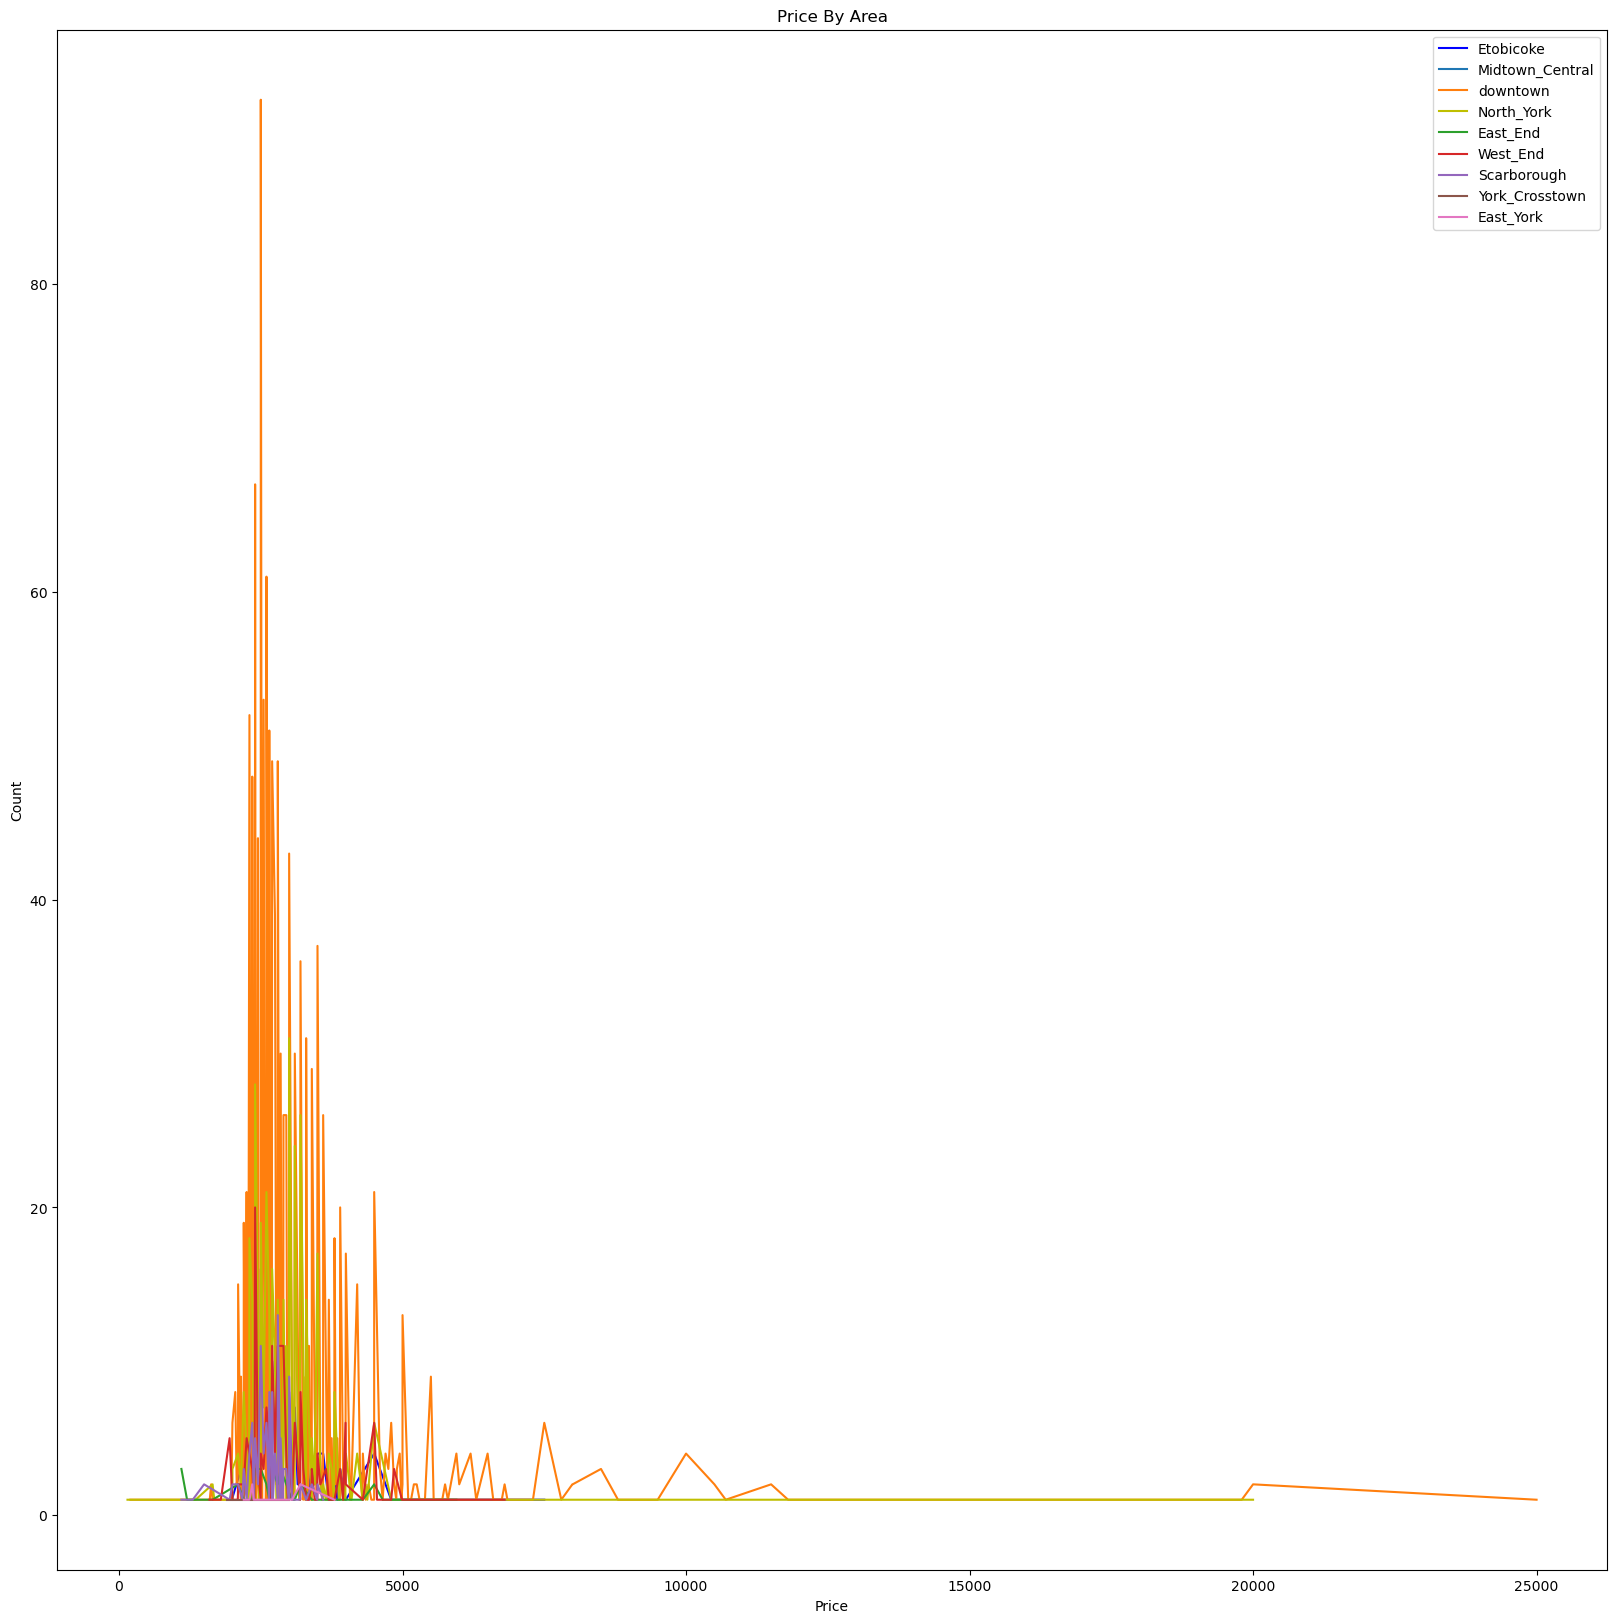

In [43]:
Etobicoke.set_index('Price')['count'].plot(kind='line',c='b',label='Etobicoke',figsize=(20,20))
Midtown_Central.set_index('Price')['count'].plot(kind='line',label='Midtown_Central')
Downtown.set_index('Price')['count'].plot(kind='line',label='downtown')
North_York.set_index('Price')['count'].plot(kind='line',label='North_York',c='y')
East_End.set_index('Price')['count'].plot(kind='line',label='East_End')
West_End.set_index('Price')['count'].plot(kind='line',label='West_End')
Scarborough.set_index('Price')['count'].plot(kind='line',label='Scarborough')
York_Crosstown.set_index('Price')['count'].plot(kind='line',label='York_Crosstown')
East_York.set_index('Price')['count'].plot(kind='line',label='East_York')
plt.title('Price By Area')
plt.xlabel('Price')
plt.ylabel('Count')
plt.legend(loc='upper right');

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2702 entries, 0 to 2701
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     2702 non-null   int64 
 1   Address        2702 non-null   object
 2   Price          2702 non-null   int64 
 3   Neighbourhood  2702 non-null   object
 4   Area           2702 non-null   object
 5   Room           2702 non-null   object
 6   Bath           2702 non-null   int64 
 7   Parking        2702 non-null   int64 
 8   Furnished      2702 non-null   object
 9   AgeofBuild     2702 non-null   object
 10  OutdoorSpace   2702 non-null   object
 11  PropertyType   2702 non-null   object
 12  Size           2702 non-null   int64 
dtypes: int64(5), object(8)
memory usage: 274.5+ KB


## 4.1.4 Pairplot for all integer columns

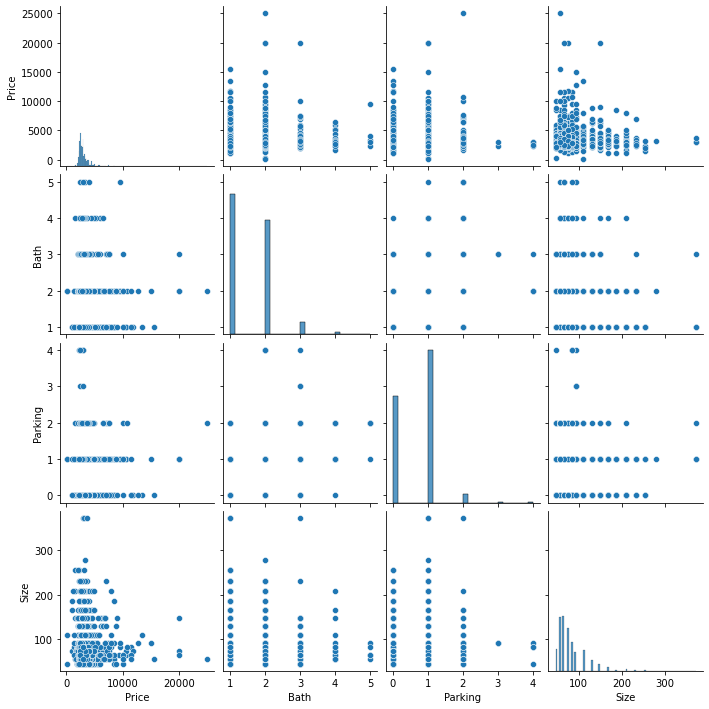

In [667]:
sns.pairplot(df[['Price','Bath','Parking','Size']])

## 4.2.1 Number of House by Area

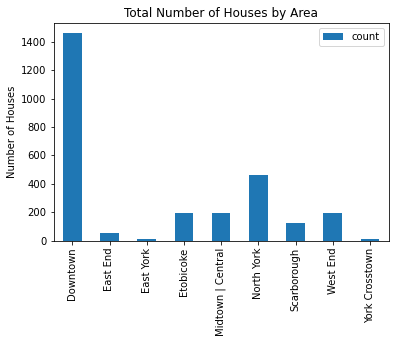

In [668]:
df.groupby('Area')['Size'].agg(['count']).plot(kind='bar',title='Total Number of Houses by Area')
plt.xlabel('', fontsize=15)
plt.ylabel('Number of Houses',fontsize=10);

## 4.2.2 Number of House by PropertyType

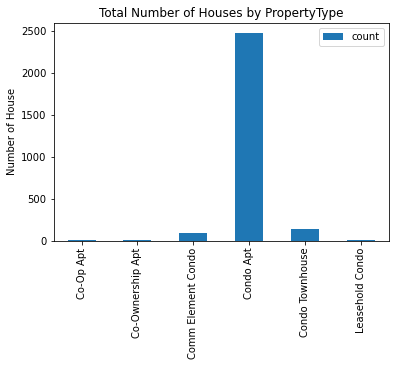

In [595]:
df.groupby('PropertyType')['Size'].agg(['count']).plot(kind='bar',title='Total Number of Houses by PropertyType')
plt.xlabel('', fontsize=15)
plt.ylabel('Number of House',fontsize=10);

## 4.2.3 Furnished 

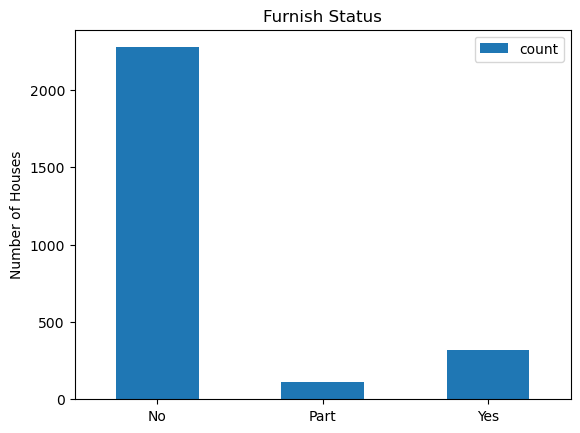

In [42]:
df.groupby('Furnished')['Size'].agg(['count']).plot(kind='bar',title='Furnish Status')
plt.xlabel('', fontsize=15)
plt.xticks(rotation=0)
plt.ylabel('Number of Houses',fontsize=10);

## 4.2.4 Size Distribution by Area

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

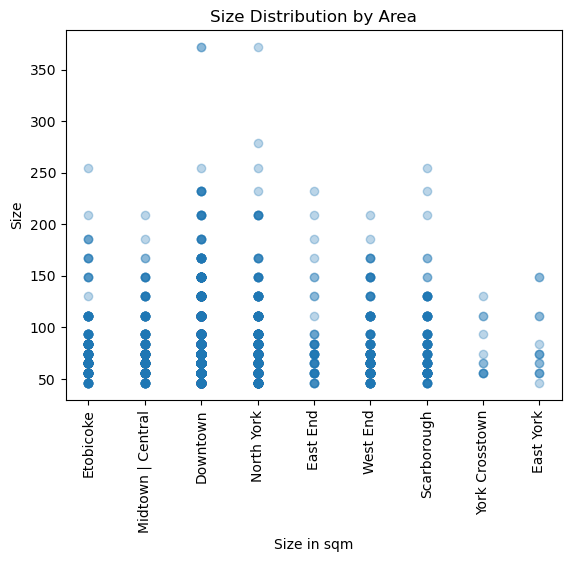

In [43]:
plt.scatter(df['Area'],df['Size'],alpha=0.3)
plt.title('Size Distribution by Area')
plt.xlabel('Size in sqm', fontsize=10)
plt.ylabel('Size',fontsize=10);
plt.xticks(rotation=90)

# 4.2.5 Price vs. Size

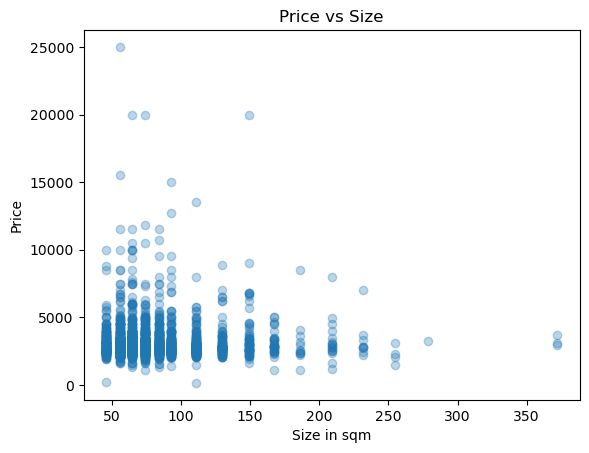

In [39]:
plt.scatter(df['Size'],df['Price'],alpha=0.3)
plt.title('Price vs Size')
plt.xlabel('Size in sqm', fontsize=10)
plt.ylabel('Price',fontsize=10);

# 4.2.6 Min Max Size by Area

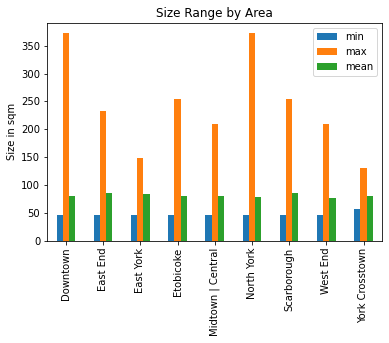

In [599]:
df.groupby('Area')['Size'].agg(['min','max','mean']).plot(kind='bar',title='Size Range by Area')
plt.xlabel('', fontsize=15)
plt.ylabel('Size in sqm',fontsize=10);

# 4.2.7 Size Range count by Area

In [671]:
srdf = df.copy()

In [672]:
sr2

,Unnamed: 0,Address,Price,Neighbourhood,Area,Room,Bath,Parking,Furnished,AgeofBuild,OutdoorSpace,PropertyType,Size
0,0,3708 - 2230 Lake Shore Blvd W,2700,Mimico,Etobicoke,1+1,1,1,No,10 years old,Open Balcony,Condo Apt,65
1,1,601 - 840 St Clair Ave W,2500,Oakwood-Vaughan,Midtown | Central,1+1,1,1,No,-,Open Balcony,Condo Apt,65
2,2,1502 - 170 Bayview Ave,3500,Corktown,Downtown,2+1,2,1,No,4 years old,Terrace,Condo Apt,84
3,3,1205 - 30 Ordnance St,2450,Fort York,Downtown,1,1,0,No,2 years old,Open Balcony,Condo Apt,56
4,4,713 - 12 Bonnycastle St,3000,The Waterfront,Downtown,1+1,2,1,No,3 years old,Open Balcony,Condo Apt,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2691,2815,53 - 2901 Jane St,3250,Glenfield-Jane Heights,North York,1,1,0,No,10 years old,Open Balcony,Condo Apt,74
2692,2816,503 - 170 Fort York Blvd,2400,CityPlace,Downtown,2,2,1,No,2 years old,Open Balcony,Condo Apt,74
2693,2817,3210 - 2220 Lakeshore Blvd,2450,Mimico,Etobicoke,2,2,1,No,1 years old,Open Balcony,Condo Apt,65
2696,2820,2206 - 251 Manitoba St,2900,Mimico,Etobicoke,1+1,1,1,No,New,Open Balcony,Condo Apt,84


In [673]:
sr1 = srdf[(srdf['Size']>=0) & (srdf['Size']<50)]

In [603]:
sr2 = srdf[(srdf['Size']>=50) & (srdf['Size']<100)]

In [604]:
sr3 = srdf[(srdf['Size']>=100) & (srdf['Size']<150)]

In [605]:
sr4 = srdf[(srdf['Size']>=150) & (srdf['Size']<200)]

In [606]:
sr5 = srdf[(srdf['Size']>=200) & (srdf['Size']<250)]

In [607]:
sr6 = srdf[(srdf['Size']>=250)]

In [ ]:
sr1['Size'] = '0-50'

In [ ]:
sr2['Size'] = '50-100'

In [ ]:
sr3['Size'] = '100-150'

In [ ]:
sr4['Size'] = '150-200'

In [ ]:
sr5['Size'] = '200-250'

In [ ]:
sr6['Size'] = '>250'

In [609]:
srcombined = pd.concat([sr1,sr2,sr3,sr4,sr5,sr6])

In [610]:
srcombined

,Unnamed: 0,Address,Price,Neighbourhood,Area,Room,Bath,Parking,Furnished,AgeofBuild,OutdoorSpace,PropertyType,Size
5,5,1114 - 96 St. Patrick St,2200,Grange Park,Downtown,1,1,0,No,14 years old,None,Condo Apt,46
13,13,4607 - 395 Bloor St E,2680,Yonge and Bloor,Downtown,2,1,0,Part,New,Open Balcony,Condo Apt,46
19,19,4807 - 1 Bloor St E,4400,Yonge and Bloor,Downtown,2+1,2,1,No,5 years old,Open Balcony,Condo Apt,46
23,23,3709 - 28 Freeland St,5000,The Waterfront,Downtown,2+1,2,1,Yes,New,Open Balcony,Condo Apt,46
29,29,1202 - 231 Fort York Blvd,2500,Fort York,Downtown,1+1,1,1,No,15 years old,Open Balcony,Condo Apt,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,1635,A - 11 Falaise Rd,1500,West Hill,Scarborough,1+1,1,0,No,5 years old,Open Balcony,Condo Apt,255
1635,1686,902 - 225 Sumach St,2050,Regent Park,Downtown,1,1,1,No,0 years old,Open Balcony,Condo Apt,255
2080,2156,2206 - 95 Mcmahon Dr,3250,Bayview Village,North York,2,2,1,No,3 years old,Open Balcony,Condo Apt,279
2621,2735,1108 - 3865 Lake Shore Blvd W,3100,Long Branch,Etobicoke,1,1,0,No,1 years old,Enclosed Balcony,Condo Apt,255


<AxesSubplot:title={'center':'Size Range by Area'}, xlabel='Size'>

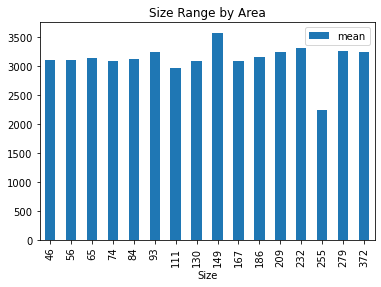

In [611]:
srcombined.groupby('Size')['Price'].agg(['mean']).plot(kind='bar',title='Size Range by Area')

## 4.3.1 Prices of Different Property Types

In [674]:
# test groupby
df.groupby('PropertyType')['Price'].agg(['mean'])

,mean
PropertyType,
Co-Op Apt,2605.000000
Co-Ownership Apt,3075.000000
Comm Element Condo,3113.080460
Condo Apt,3122.181230
Condo Townhouse,3103.234848
Leasehold Condo,3187.500000


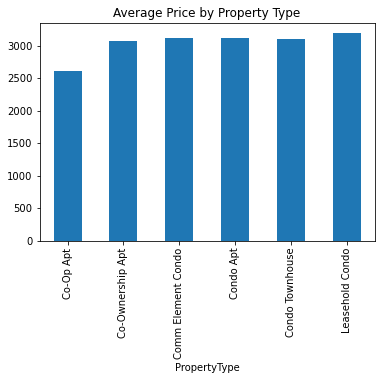

In [675]:
df.groupby('PropertyType')['Price'].agg('mean').plot(kind = 'bar', title = 'Average Price by Property Type');

## 4.3.2 Prices of Different Room Types

In [676]:
df.groupby('Room')['Price'].agg(['min', 'max', 'mean'])

,min,max,mean
Room,,,
1,1100,15500,2912.580210
1+1,1100,11800,2974.633234
1+2,2400,8500,4292.500000
2,200,20000,3258.226221
2+1,1625,25000,3377.827465
2+2,2800,3250,3050.000000
3,149,20000,3467.549020
3+1,2050,9500,3272.314286
3+2,2850,5200,3785.000000


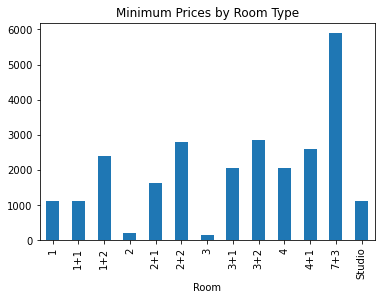

In [677]:
df.groupby('Room')['Price'].agg('min').plot(kind ='bar', title = 'Minimum Prices by Room Type');

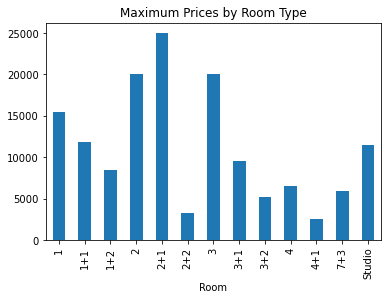

In [678]:
df.groupby('Room')['Price'].agg('max').plot(kind ='bar', title = 'Maximum Prices by Room Type');

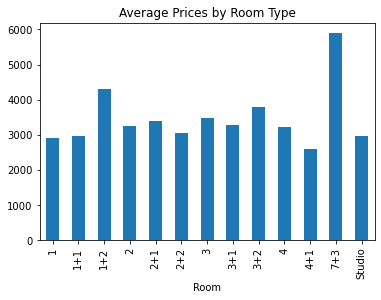

In [679]:
df.groupby('Room')['Price'].agg('mean').plot(kind ='bar', title = 'Average Prices by Room Type');

## 4.3.3 Prices of Different Parking Spots

In [682]:
df.groupby('Parking')['Price'].agg(['count', 'mean'])

,count,mean
Parking,,
0,1076,3029.550186
1,1530,3149.998039
2,90,3720.044444
3,2,2650.000000
4,4,2700.000000


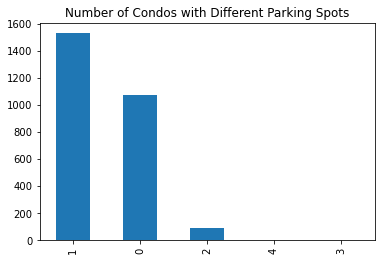

In [683]:
df['Parking'].value_counts().plot(kind = 'bar', title = 'Number of Condos with Different Parking Spots');

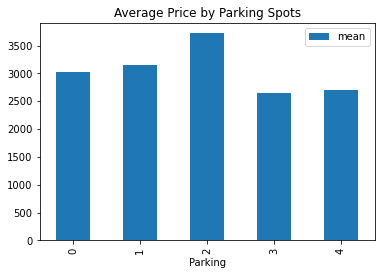

In [684]:
df.groupby('Parking')['Price'].agg(['mean']).plot(kind = 'bar', title = 'Average Price by Parking Spots');